<a href="https://colab.research.google.com/github/Ananthzeke/Optimization-techniques/blob/main/simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy import asarray,exp
from numpy.random import rand,randn,seed,uniform

In [44]:
def objective(x):
	return  (x[0]**2+x[1]-11)**2 +(x[0]+x[1]**2-7)**2

In [45]:


def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    best =uniform(bounds[0][0],bounds[0][1],2)
    best_eval = objective(best)
    curr, curr_eval = best, best_eval
    best_track = []
    for i in range(n_iterations):
        candidate = curr + randn(2) * step_size
        candidate_eval = objective(candidate)
        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
            print(f'>iteration {i}: f{best} = {best_eval}')
            best_track.append(best)
        diff = candidate_eval - curr_eval
        t = temp / float(i + 1)
        metropolis = exp(-diff / t)
        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return best, best_eval,best_track



In [54]:
seed(1)
bounds = asarray([[0, 5.0]])
n_iterations = 10000
step_size = 0.001
temp = 100
print('Starting simulated annealing algorithm\n')
best, score,best_track = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('\nSimulated annealing completed\n')
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

Starting simulated annealing algorithm

>iteration 0: f[2.08458185 3.6005495 ] = 74.10569936877003
>iteration 1: f[2.08544726 3.59824796] = 73.84519229567246
>iteration 2: f[2.08719207 3.59748675] = 73.74547929222159
>iteration 3: f[2.08751111 3.59723738] = 73.71519994864664
>iteration 4: f[2.08897322 3.59517724] = 73.47632964051073
>iteration 5: f[2.0886508  3.59479319] = 73.43744195520023
>iteration 6: f[2.08978457 3.5936933 ] = 73.30684903962323
>iteration 7: f[2.08961214 3.59281544] = 73.21285376306804
>iteration 9: f[2.0907963  3.59226866] = 73.1422006089893
>iteration 200: f[2.10238232 3.59323978] = 73.14092888539076
>iteration 215: f[2.09803035 3.59262458] = 73.11362877748888
>iteration 216: f[2.0983116  3.59137056] = 72.97441959059148
>iteration 217: f[2.09843473 3.59000096] = 72.82431474095908
>iteration 219: f[2.09846067 3.58970061] = 72.79144017518236
>iteration 229: f[2.09883549 3.58943088] = 72.75866826595309
>iteration 230: f[2.09836038 3.58747137] = 72.5505460446506
>ite

In [47]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def plot_optimization(fitness,minx,maxx,best_pos_track,levels):
    x = np.linspace(minx,maxx,300)
    X1,X2 = np.meshgrid(x,x)
    X = np.dstack([X1,X2])
    Y = np.apply_along_axis(fitness,-1,X)
    plt.figure(figsize=(10,10))
    plt.contourf(X1,X2,Y,levels=levels,cmap="Blues")
    x,y = np.array(best_pos_track).T
    plt.plot(x,y,"r")
    plt.plot(*best_pos_track[0],"o",label="start")
    plt.plot(*best_pos_track[-1],"X",label="end")
    plt.legend()
    plt.show()

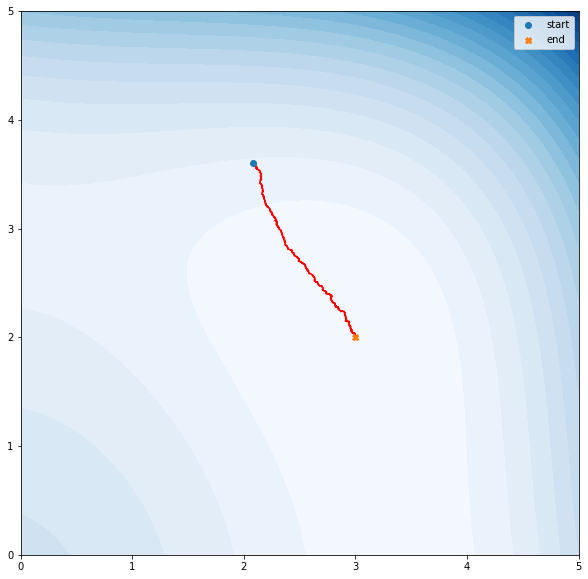

In [55]:
plot_optimization(objective,0,5,best_track,25)